In [71]:
import random
import numpy as np
import matplotlib.pyplot as plt

Random Pattern with Unknown Length

In [72]:
def random_target(min_bits=2, max_bits=32):
    size = random.randint(min_bits, max_bits)
    return ''.join(random.choice('01') for _ in range(size))


Adaptive Fitness Function

In [73]:
def adaptive_fitness(guess, target_sequence):
    common = min(len(guess), len(target_sequence))
    score = sum(guess[i] == target_sequence[i] for i in range(common))
    penalty = abs(len(guess) - len(target_sequence))
    return (score - penalty) / max(len(guess), len(target_sequence))

Adaptive Mutation Function

In [74]:
def adaptive_mutate(pattern):
    pattern = list(pattern)
    mutation_type = random.choice(["flip", "add", "remove"])

    if mutation_type == "flip" and pattern:
        idx = random.randrange(len(pattern))
        pattern[idx] = '1' if pattern[idx] == '0' else '0'

    elif mutation_type == "add":
        bit = random.choice(['0', '1'])
        idx = random.randint(0, len(pattern))
        pattern.insert(idx, bit)

    elif mutation_type == "remove" and len(pattern) > 2:
        idx = random.randrange(len(pattern))
        pattern.pop(idx)

    return ''.join(pattern)

Adaptive Crossover Function

In [75]:
def adaptive_crossover(p1, p2):
    min_len = min(len(p1), len(p2))
    if min_len < 2:
        return p1
    point = random.randint(1, min_len - 1)
    child = p1[:point] + p2[point:]
    # Randomly trim or extend slightly for exploration
    if random.random() < 0.3:
        child = adaptive_mutate(child)
    return child

Adaptive Evolutionary Search Algorithm

In [76]:
def adaptive_population_search(target, pop_size=80, select_ratio=0.3, max_gen=150):
    pop = [random_target(len(target), len(target)) for _ in range(pop_size)]
    best_history = []
    for gen in range(max_gen):
        fits = [adaptive_fitness(p, target) for p in pop]
        best_fit = max(fits)
        best_history.append(best_fit)
        if best_fit >= 1.0:
            break
        sorted_pop = [p for _, p in sorted(zip(fits, pop), reverse=True)]
        survivors = sorted_pop[:int(pop_size*select_ratio)]
        offspring = []
        for _ in range(pop_size - len(survivors)):
            p1, p2 = random.sample(survivors, 2)
            child = adaptive_crossover(p1, p2)
            offspring.append(child)
        pop = survivors + offspring
        if len(best_history) > 8 and len(set(best_history[-5:])) == 1:
            break
    return gen+1, max(best_history)


Experiment and Visualization

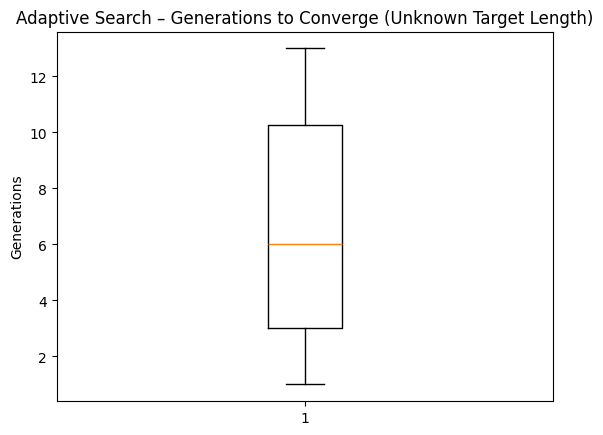

Mean generations: 6.5
Mean final fitness: 0.99


In [77]:
n_trials = 20
gens_list = []
fitness_list = []

for seed in range(n_trials):
    random.seed(seed)
    target = random_target()
    gens, best_fit = adaptive_population_search(target)
    gens_list.append(gens)
    fitness_list.append(best_fit)

plt.boxplot(gens_list)
plt.title("Adaptive Search – Generations to Converge (Unknown Target Length)")
plt.ylabel("Generations")
plt.show()

print(f"Mean generations: {np.mean(gens_list):.1f}")
print(f"Mean final fitness: {np.mean(fitness_list):.2f}")